初始 w=0.5, 最终 w=-0.005263157894736846
初始 w=0.3, 最终 w=-0.005263157894736846
初始 w=0.1, 最终 w=0.005263157894736846
初始 w=-0.2, 最终 w=-0.005263157894736839
初始 w=-0.4, 最终 w=0.005263157894736846
L1 正则化特性:
1. 当 w 接近 0 时产生较大梯度，将参数推向精确的 0
2. 导致模型参数稀疏，实现特征选择
3. 损失函数在 w=0 处不可微，但可以使用次梯度
4. 许多参数将变为精确的 0，而不仅仅是接近 0 的小值


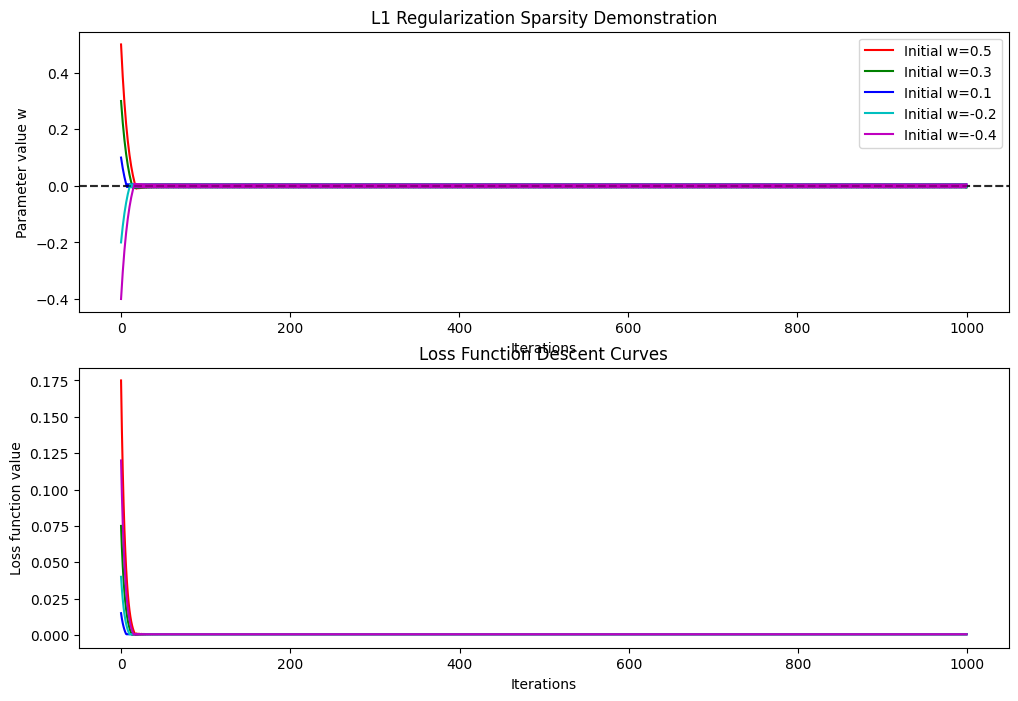

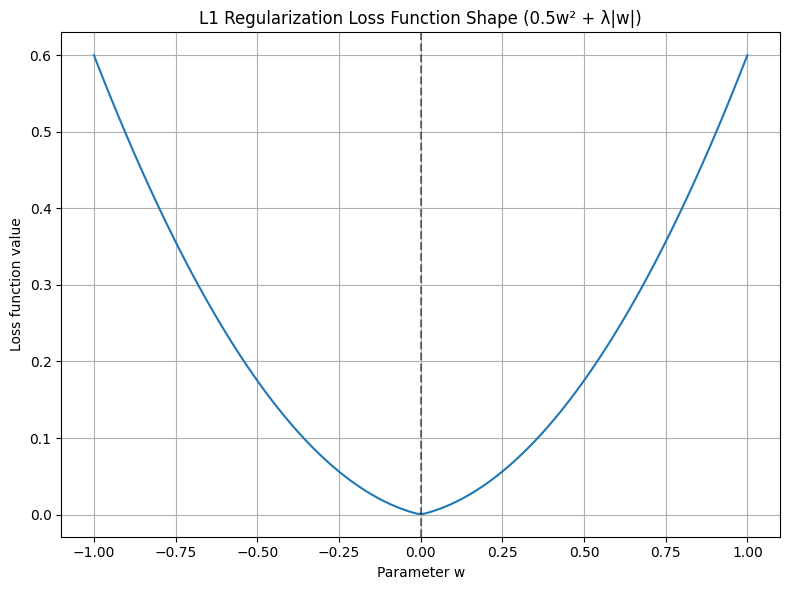

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 设置英文字体
plt.rcParams['font.family'] = 'DejaVu Sans'

# 超参数
lambda_reg = 0.5   # 增大正则化系数,使参数更容易被推向0
learning_rate = 0.1
initial_w = 0.5    # 初始参数值

# 创建不同初始值的实验
initial_values = [0.5, 0.3, 0.1, -0.2, -0.4]
colors = ['r', 'g', 'b', 'c', 'm']
plt.figure(figsize=(12, 8))

# 为每个初始值运行梯度下降
for idx, w_init in enumerate(initial_values):
    w = w_init
    w_history = [w]
    loss_history = []
    
    for i in range(2000):  # 增加迭代次数
        # 计算损失函数 f(w) = 0.5 * w^2 + lambda_reg * |w|
        loss = 0.5 * w**2 + lambda_reg * abs(w)
        loss_history.append(loss)
        
        # 计算梯度：二次项部分的梯度是 w
        grad_data = w
        
        # L1 正则化部分的梯度：次梯度
        if w > 0:
            grad_reg = lambda_reg
        elif w < 0:
            grad_reg = -lambda_reg
        else:
            grad_reg = 0  # 当 w==0 时，取次梯度为 0
            
        grad_total = grad_data + grad_reg
        
        # 梯度下降更新
        w = w - learning_rate * grad_total
        
        # 如果w非常接近0，直接设为0（降低阈值使参数更容易变为0）
        if abs(w) < 1e-6:
            w = 0.0
            
        w_history.append(w)
    
    # 打印最终的 w 值
    print(f"初始 w={w_init}, 最终 w={w}")
    
    # 绘制参数变化曲线
    plt.subplot(2, 1, 1)
    plt.plot(w_history, label=f'Initial w={w_init}', color=colors[idx])
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.xlabel('Iterations')
    plt.ylabel('Parameter value w')
    plt.title('L1 Regularization Sparsity Demonstration')
    plt.legend()
    
    # 绘制损失函数曲线
    plt.subplot(2, 1, 2)
    plt.plot(loss_history, label=f'Initial w={w_init}', color=colors[idx])
    plt.xlabel('Iterations')
    plt.ylabel('Loss function value')
    plt.title('Loss Function Descent Curves')

# 绘制损失函数轮廓
plt.figure(figsize=(8, 6))
w_range = np.linspace(-1, 1, 100)
loss_values = [0.5 * w**2 + lambda_reg * abs(w) for w in w_range]
plt.plot(w_range, loss_values)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Parameter w')
plt.ylabel('Loss function value')
plt.title('L1 Regularization Loss Function Shape (0.5w² + λ|w|)')
plt.grid(True)

print("L1 正则化特性:")
print("1. 当 w 接近 0 时产生较大梯度，将参数推向精确的 0")
print("2. 导致模型参数稀疏，实现特征选择")
print("3. 损失函数在 w=0 处不可微，但可以使用次梯度")
print("4. 许多参数将变为精确的 0，而不仅仅是接近 0 的小值")

plt.tight_layout()
plt.show()